In [1]:
import pandas as pd 
import cv2
import os 
import imgaug as ia
from imgaug import augmenters as iaa
import imageio
import numpy as np

import matplotlib.pyplot as plt

from conf import train_config
from utils import *

data_folder = train_config.data_foler

# To prepare data
data_train = pd.read_csv(train_config.train_csv_path)
data_val = pd.read_csv(train_config.val_csv_path)

data_train_mb = data_train.loc[data_train[train_config.gt_class] == 1]
data_val_mb = data_val.loc[data_val[train_config.gt_class] == 1]

print(len(data_val_mb))
data_test = pd.read_csv(train_config.test_csv_path)

Using TensorFlow backend.


812


/public/lixin/.local/lib/python3.6/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


In [2]:
data_val_mb.head()

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyx,p_yellow,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
68,68,train_fla/validates/01/images/Patient_01_68.png,train_fla/validates/01/masks/GT_01_68.png,1,1,0,0,1,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,241.0,260.0
69,69,train_fla/validates/01/images/Patient_01_69.png,train_fla/validates/01/masks/GT_01_69.png,1,1,0,0,1,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,240.0,260.0
70,70,train_fla/validates/01/images/Patient_01_70.png,train_fla/validates/01/masks/GT_01_70.png,1,1,0,0,1,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,239.0,259.0
71,71,train_fla/validates/01/images/Patient_01_71.png,train_fla/validates/01/masks/GT_01_71.png,1,1,0,0,1,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,240.0,258.0
72,72,train_fla/validates/01/images/Patient_01_72.png,train_fla/validates/01/masks/GT_01_72.png,1,1,0,0,1,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,240.0,256.0


In [3]:
data_train_mb.head()

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyy,cyx,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
50,50,train_fla/train/05/images/Patient_05_50.png,train_fla/train/05/masks/GT_05_50.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,274.0,269.0
51,51,train_fla/train/05/images/Patient_05_51.png,train_fla/train/05/masks/GT_05_51.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,276.0,268.0
52,52,train_fla/train/05/images/Patient_05_52.png,train_fla/train/05/masks/GT_05_52.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,277.0,267.0
53,53,train_fla/train/05/images/Patient_05_53.png,train_fla/train/05/masks/GT_05_53.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,278.0,265.0
54,54,train_fla/train/05/images/Patient_05_54.png,train_fla/train/05/masks/GT_05_54.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,279.0,262.0


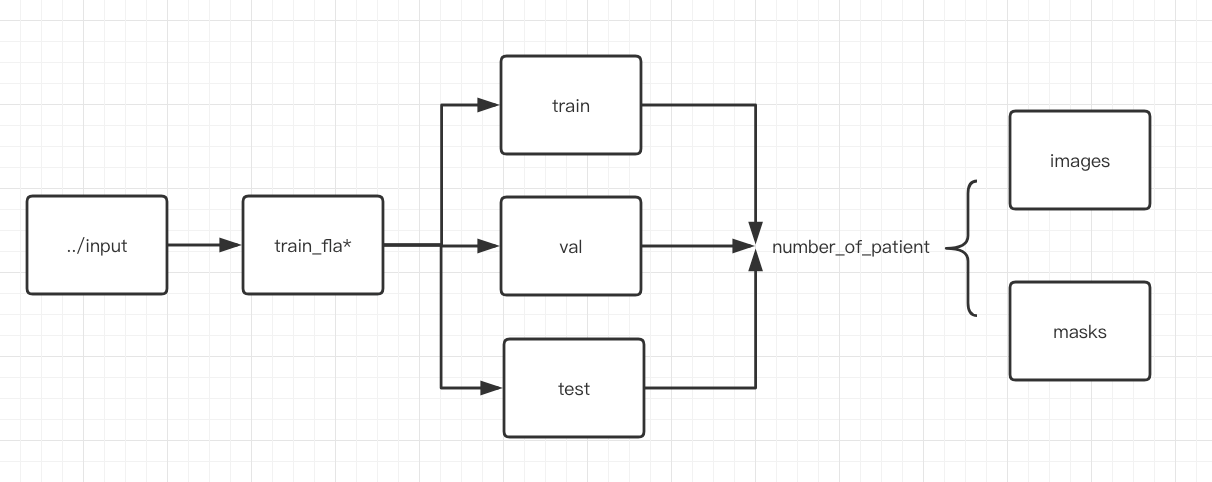

# get data

![](1train_sample.png)

In [4]:
in_df = data_train.loc[data_train[train_config.gt_class] == 1]

In [5]:
in_df.head()

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyy,cyx,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
50,50,train_fla/train/05/images/Patient_05_50.png,train_fla/train/05/masks/GT_05_50.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,274.0,269.0
51,51,train_fla/train/05/images/Patient_05_51.png,train_fla/train/05/masks/GT_05_51.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,276.0,268.0
52,52,train_fla/train/05/images/Patient_05_52.png,train_fla/train/05/masks/GT_05_52.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,277.0,267.0
53,53,train_fla/train/05/images/Patient_05_53.png,train_fla/train/05/masks/GT_05_53.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,278.0,265.0
54,54,train_fla/train/05/images/Patient_05_54.png,train_fla/train/05/masks/GT_05_54.png,5,1,1,0,1,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,279.0,262.0


In [6]:
file = in_df.loc[in_df['folder']==5]

In [7]:
# file

In [8]:
file = file.sample(10)
file_name = file['filename'].values

In [9]:
file_name

array(['train_fla/train/05/images/Patient_05_65.png',
       'train_fla/train/05/images/Patient_05_185.png',
       'train_fla/train/05/images/Patient_05_132.png',
       'train_fla/train/05/images/Patient_05_50.png',
       'train_fla/train/05/images/Patient_05_155.png',
       'train_fla/train/05/images/Patient_05_184.png',
       'train_fla/train/05/images/Patient_05_92.png',
       'train_fla/train/05/images/Patient_05_150.png',
       'train_fla/train/05/images/Patient_05_146.png',
       'train_fla/train/05/images/Patient_05_159.png'], dtype=object)

In [10]:
# help(in_df.sample)

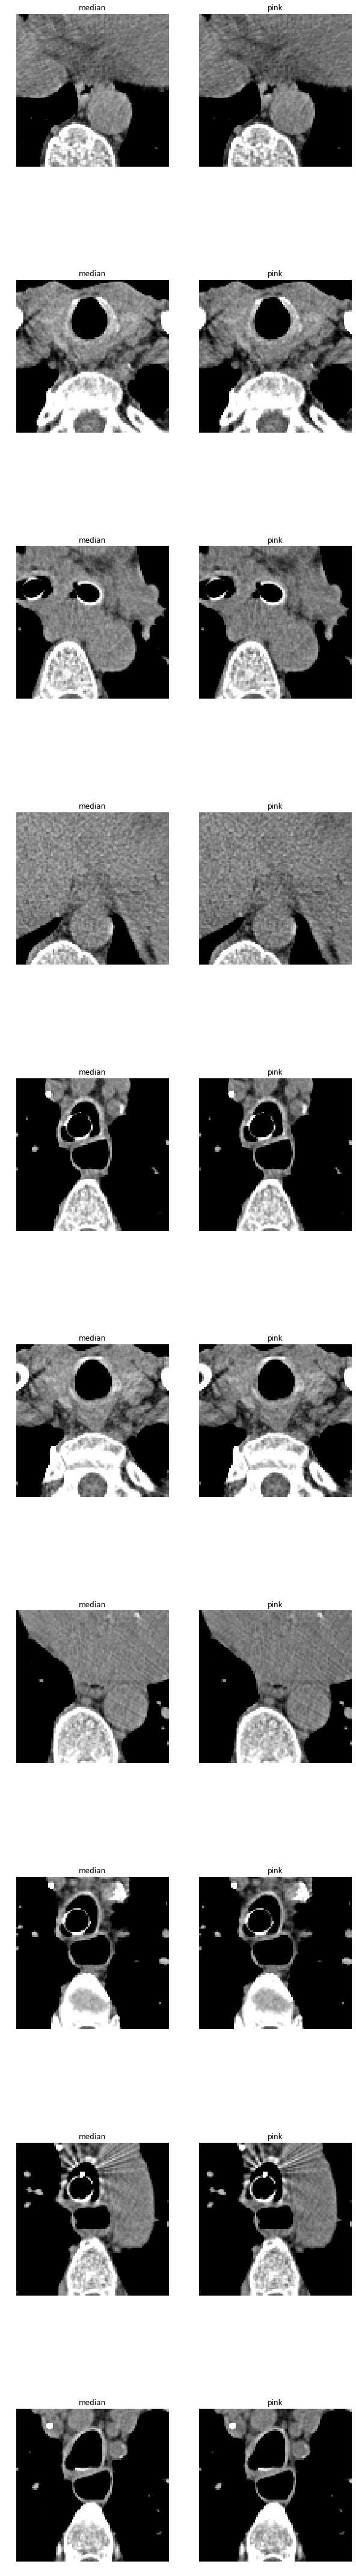

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

fig, m_axs = plt.subplots(10, 2, figsize = (10, 80))
[c_ax.axis('off') for c_ax in m_axs.flatten()]


for (ax1, ax2), c_img_name in zip(m_axs, file_name):

    y = in_df.loc[in_df['filename'] == c_img_name][train_config.cy].values[0]
    x = in_df.loc[in_df['filename'] == c_img_name][train_config.cx].values[0]
    
    c_path = data_folder + c_img_name
    c_img = crop_center_pic(cv2.imread(c_path), int(y), int(x))
    
    c_path2 = data_folder.replace('pink-normal','pink-median') + c_img_name
    c_img2 = crop_center_pic(cv2.imread(c_path2), int(y), int(x))
    

    ax2.imshow(c_img)
    ax2.set_title('pink')
    
    ax1.imshow(c_img2)
    ax1.set_title('median')
# fig.savefig('52-pink.png')

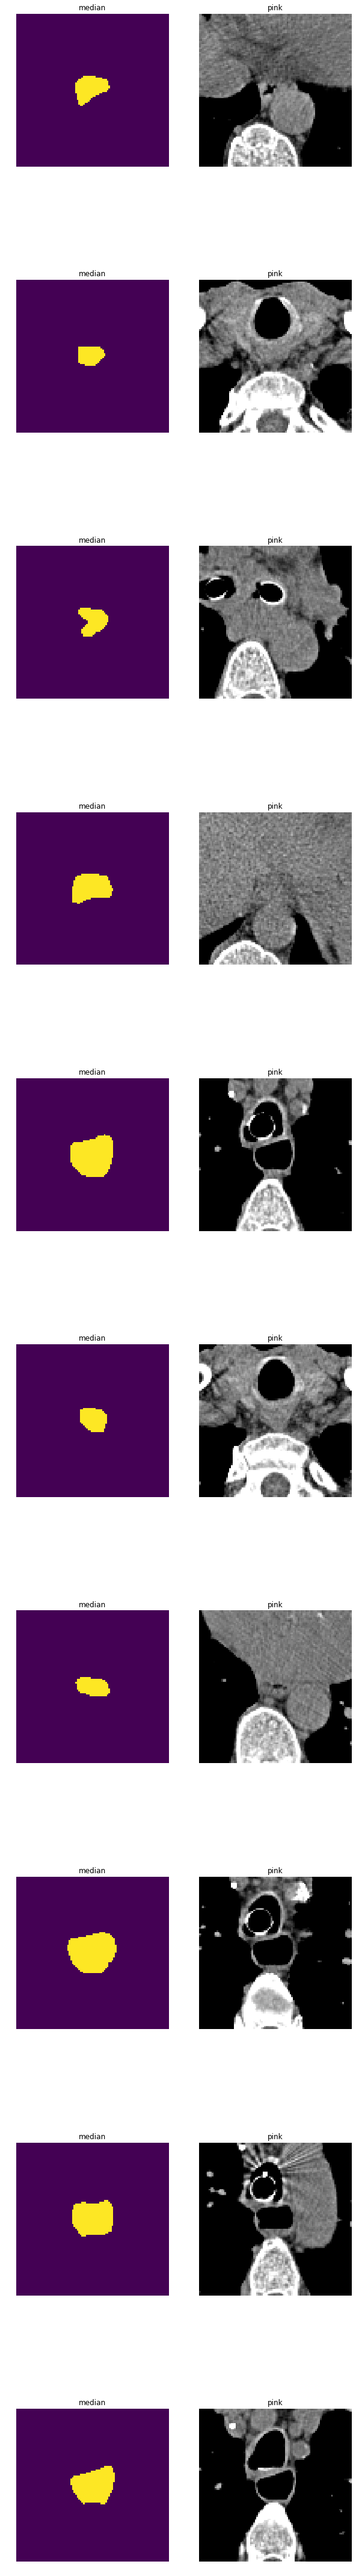

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

fig, m_axs = plt.subplots(10, 2, figsize = (10, 80))
[c_ax.axis('off') for c_ax in m_axs.flatten()]


for (ax1, ax2), c_img_name in zip(m_axs, file_name):

    y = in_df.loc[in_df['filename'] == c_img_name][train_config.cy].values[0]
    x = in_df.loc[in_df['filename'] == c_img_name][train_config.cx].values[0]
    
    mask_path = in_df.loc[in_df['filename'] == c_img_name]['maskname'].values[0]
    
    c_path = data_folder + c_img_name
    c_img = crop_center_pic(cv2.imread(c_path), int(y), int(x))
    
    c_path2 = data_folder + mask_path
    c_img2 = crop_center_mask(cv2.imread(c_path2, 0), int(y), int(x))
    c_img2 = np.where(np.equal(c_img2, train_config.class_label), 1, 0)
    
    

    ax2.imshow(c_img)
    ax2.set_title('pink')
    
    ax1.imshow(c_img2)
    ax1.set_title('median')
# fig.savefig('52-pink.png')

In [30]:
file

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyx,p_yellow,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
600,600,train_fla/validates/34/images/Patient_34_143.png,train_fla/validates/34/masks/GT_34_143.png,34,1,0,1,0,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,318.0,260.0
576,576,train_fla/validates/34/images/Patient_34_119.png,train_fla/validates/34/masks/GT_34_119.png,34,1,0,1,1,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,316.0,264.0
522,522,train_fla/validates/34/images/Patient_34_65.png,train_fla/validates/34/masks/GT_34_65.png,34,1,1,0,1,80,507,...,259.0,0.0,244.0,276.0,197.0,294.0,244.0,272.0,263.0,260.0
580,580,train_fla/validates/34/images/Patient_34_123.png,train_fla/validates/34/masks/GT_34_123.png,34,1,0,1,1,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,303.0,271.0
588,588,train_fla/validates/34/images/Patient_34_131.png,train_fla/validates/34/masks/GT_34_131.png,34,1,0,1,0,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,330.0,269.0
569,569,train_fla/validates/34/images/Patient_34_112.png,train_fla/validates/34/masks/GT_34_112.png,34,1,0,1,1,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,260.0,272.0
521,521,train_fla/validates/34/images/Patient_34_64.png,train_fla/validates/34/masks/GT_34_64.png,34,1,1,0,1,80,507,...,259.0,0.0,244.0,276.0,197.0,294.0,244.0,272.0,262.0,268.0
567,567,train_fla/validates/34/images/Patient_34_110.png,train_fla/validates/34/masks/GT_34_110.png,34,1,0,1,1,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,309.0,274.0
582,582,train_fla/validates/34/images/Patient_34_125.png,train_fla/validates/34/masks/GT_34_125.png,34,1,0,1,1,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,324.0,262.0
602,602,train_fla/validates/34/images/Patient_34_145.png,train_fla/validates/34/masks/GT_34_145.png,34,1,0,1,0,80,507,...,259.0,1.0,244.0,276.0,197.0,294.0,244.0,272.0,320.0,262.0


In [31]:
# image_path = in_df['filename'].values[0]
# mask_path = in_df['maskname'].values[0]


# image_path = 'train_fla/validates/05/images/Patient_05_64.png'
# mask_path = 'train_fla/validates/05/masks/GT_05_64.png'

# y = in_df.loc[in_df['filename'] == image_path]['cry'].values[0]
# x = in_df.loc[in_df['filename'] == image_path]['crx'].values[0]

image_path  = file['filename'].values[0]
mask_path  = file['maskname'].values[0]

y = file[config].values[0]
x = file['cpx'].values[0]

print(y, x)
file = data_folder + image_path  
mask = data_folder + mask_path


print(file)
print(mask)
c_img = crop_center_pic(cv2.imread(file), int(y), int(x))
c_mask = crop_center_mask(cv2.imread(mask, 0), int(y), int(x))

NameError: name 'config' is not defined

In [14]:
plt.imshow(np.where(np.equal(c_mask, 2), 1, 0))

NameError: name 'c_mask' is not defined

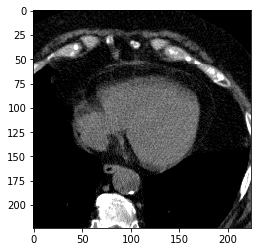

In [14]:
plt.imshow(c_img)

# c_img, c_mask

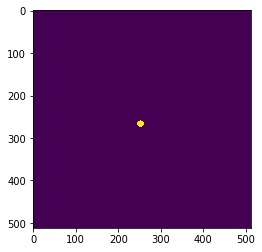

In [23]:
mask = '/public/lixin/DATA/segthor/input/blue/train_fla/train/35/masks/GT_35_0.png'
img = cv2.imread(mask, 0)
img
plt.imshow(img)

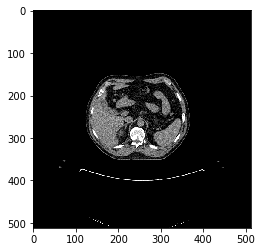

In [24]:
mask = '/public/lixin/DATA/segthor/input/blue/train_fla/train/35/images/Patient_35_0.png'
img = cv2.imread(mask)
img
plt.imshow(img)

In [13]:
y = np.nan
if  y != np.nan:
    print(type(y), y)

<class 'float'> nan


In [14]:
y = np.nan
if  type(y) != np.float:
    print(type(y), y)